In [51]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [52]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_labels_df.pkl"))

In [53]:
# Remove all the features that are not contains 'Pre' in their name
features_df = features_df.loc[:, ~features_df.columns.str.contains('Post')]

# Remove all the features that are not contains 'DVA' in their name or config.MOVIE
features_df = features_df.loc[:, features_df.columns.str.contains('DVA') | features_df.columns.str.contains(config.MOVIE)]

features_df.head()

,Movie,DVA_Mean_Gaze_Pre,DVA_Median_Gaze_Pre,DVA_Std_Gaze_Pre,DVA_Max_Gaze_Pre,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,32,9.25312,0.852175,-21.755539,-2.846803,18.481207,-22.170852,10.213913,10.876323,3.115745,-19.984535,2.744922,19.634904,-10.96701,-9.373992
1,14,-28.964029,-40.461852,20.785954,0.94866,-67.264808,21.878396,-30.909834,-22.163615,-39.96257,18.533834,8.603429,-52.490432,16.026598,-17.298841
2,53,-33.10411,-53.091721,35.800061,-2.732389,-17.697891,37.062916,-35.709998,-21.957136,-17.066975,22.7489,-3.34199,-16.282419,19.594506,-15.453564
3,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.05759,37.112088,13.60883,0.5873,15.754212,33.59058,-13.027947
4,7,8.360576,20.932871,-7.26684,8.259706,88.595905,-10.212786,14.090493,10.288895,20.943098,-20.413501,-18.69337,3.942045,-20.413501,10.288895


In [54]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Movie                     4080 non-null   int8  
 1   DVA_Mean_Gaze_Pre         3864 non-null   object
 2   DVA_Median_Gaze_Pre       3864 non-null   object
 3   DVA_Std_Gaze_Pre          3864 non-null   object
 4   DVA_Max_Gaze_Pre          3864 non-null   object
 5   DVA_Min_Gaze_Pre          3864 non-null   object
 6   DVA_Sem_Gaze_Pre          3864 non-null   object
 7   DVA_AUC_Gaze_Pre          3864 non-null   object
 8   DVA_Mean_Fixations_Pre    4068 non-null   object
 9   DVA_Median_Fixations_Pre  4068 non-null   object
 10  DVA_Std_Fixations_Pre     4056 non-null   object
 11  DVA_Max_Fixations_Pre     4068 non-null   object
 12  DVA_Min_Fixations_Pre     4068 non-null   object
 13  DVA_Sem_Fixations_Pre     4056 non-null   object
 14  DVA_AUC_Fixations_Pre   

In [55]:
labels_df.head()

,normalized_by_session_a
series_id,
0,0
1,1
2,0
3,1
4,1


In [56]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4080 entries, 0 to 4079
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   normalized_by_session_a  4080 non-null   int64
dtypes: int64(1)
memory usage: 63.8 KB


Data Cleaning

how many missing values / inf values are there in each column? show the top 10

In [57]:
print('Number of missing values in each column:', features_df.isin([np.nan, np.inf, -np.inf]).sum(axis=0).sort_values(ascending=False).head(10))

Number of missing values in each column: DVA_Mean_Gaze_Pre         216
DVA_Median_Gaze_Pre       216
DVA_Std_Gaze_Pre          216
DVA_Max_Gaze_Pre          216
DVA_Min_Gaze_Pre          216
DVA_Sem_Gaze_Pre          216
DVA_AUC_Gaze_Pre          216
DVA_Std_Fixations_Pre      24
DVA_Sem_Fixations_Pre      24
DVA_Mean_Fixations_Pre     12
dtype: int64


Remove columns with more than 30% missing values or inf values

In [58]:
features_df = features_df.loc[:, features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0) < 0.3]

In [59]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=0).sort_values(ascending=False).head(10)

DVA_Mean_Gaze_Pre         0.052941
DVA_Median_Gaze_Pre       0.052941
DVA_Std_Gaze_Pre          0.052941
DVA_Max_Gaze_Pre          0.052941
DVA_Min_Gaze_Pre          0.052941
DVA_Sem_Gaze_Pre          0.052941
DVA_AUC_Gaze_Pre          0.052941
DVA_Std_Fixations_Pre     0.005882
DVA_Sem_Fixations_Pre     0.005882
DVA_Mean_Fixations_Pre    0.002941
dtype: float64

how many missing values / inf values are there in each row? show the top 10

In [60]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

3434    0.933333
2490    0.933333
2754    0.933333
1397    0.933333
3856    0.933333
2356    0.933333
3290    0.933333
3363    0.933333
471     0.933333
2943    0.933333
dtype: float64

Remove rows with more than 50% missing values

In [61]:
features_df = features_df.loc[features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1) < 0.5]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [62]:
features_df.isin([np.nan, np.inf, -np.inf]).mean(axis=1).sort_values(ascending=False).head(10)

1044    0.466667
1643    0.466667
2539    0.466667
533     0.466667
531     0.466667
525     0.466667
1637    0.466667
1639    0.466667
504     0.466667
502     0.466667
dtype: float64

Train/Test Split (before any preprocessing is done)

In [63]:
# Excluding for comparison- BB13, DK47
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "pairwise_sessions_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()


# Shuffle the list of subject IDs randomly with seed 1
np.random.seed(1)
np.random.shuffle(subject_ids)

# Order the list of subject IDs alphabetically
# subject_ids = np.sort(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.85)]
print(train_subject_ids)
test_subject_ids = subject_ids[int(len(subject_ids)*0.85):]
print(test_subject_ids)

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

['MN01' 'TA01' 'AI09' 'KR13' 'PS08' 'MA40' 'BO03' 'NN81' 'BH27' 'KM28'
 'DK47' 'FY25' 'RS30' 'BG97' 'NY90' 'AS20' 'HB81' 'MN37' 'GN10' 'SM28'
 'BB30' 'GE44' 'AJ31' 'ZW57' 'RN85' 'PM15' 'WE10' 'KL89']
['RY20' 'CR06' 'AM45' 'HR58' 'HM02' 'ZN05']


In [64]:
# from sklearn.model_selection import train_test_split
# 
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df,
#                                                     random_state=420,
#                                                     test_size=0.1)

In [65]:
X_train.head()

,Movie,DVA_Mean_Gaze_Pre,DVA_Median_Gaze_Pre,DVA_Std_Gaze_Pre,DVA_Max_Gaze_Pre,DVA_Min_Gaze_Pre,DVA_Sem_Gaze_Pre,DVA_AUC_Gaze_Pre,DVA_Mean_Fixations_Pre,DVA_Median_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Sem_Fixations_Pre,DVA_AUC_Fixations_Pre
0,32,9.25312,0.852175,-21.755539,-2.846803,18.481207,-22.170852,10.213913,10.876323,3.115745,-19.984535,2.744922,19.634904,-10.96701,-9.373992
1,14,-28.964029,-40.461852,20.785954,0.94866,-67.264808,21.878396,-30.909834,-22.163615,-39.96257,18.533834,8.603429,-52.490432,16.026598,-17.298841
2,53,-33.10411,-53.091721,35.800061,-2.732389,-17.697891,37.062916,-35.709998,-21.957136,-17.066975,22.7489,-3.34199,-16.282419,19.594506,-15.453564
3,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.05759,37.112088,13.60883,0.5873,15.754212,33.59058,-13.027947
4,7,8.360576,20.932871,-7.26684,8.259706,88.595905,-10.212786,14.090493,10.288895,20.943098,-20.413501,-18.69337,3.942045,-20.413501,10.288895


Fill missing values with the mean of the column

In [66]:
# fill inf values with the mean of the column
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_test = X_test.replace([np.inf, -np.inf], np.nan)

X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

Remove columns with low variance (threshold = 5%), for numerical features only

In [67]:
from sklearn.feature_selection import VarianceThreshold

# Get the indices of the non-numerical columns
non_numeric_columns_idx = [X_train.columns.get_loc(col) for col in X_train.select_dtypes(exclude=['float64', 'int64']).columns]

# Create VarianceThreshold object with a variance with a threshold of 0.05
thresholder = VarianceThreshold(threshold=0.05)

# Fit the thresholder to the data
thresholder.fit(X_train.select_dtypes(include=['float64', 'int64']))

# Get the indices of the columns that are retained
feature_idx = thresholder.get_support(indices=True)

# Create a list of the names of the retained columns, and the non-numerical columns
feature_idx = list(feature_idx) + list(non_numeric_columns_idx)
feature_names = X_train.columns[feature_idx]

# Print the names of the dropped columns
dropped_columns = list(set(X_train.columns) - set(feature_names))
print(dropped_columns)

# Subset the dataframe to include only the selected columns
X_train = X_train[feature_names]
X_test = X_test[feature_names]

['DVA_AUC_Fixations_Pre']


Remove highly correlated features

In [68]:
# # Create correlation matrix
# corr_matrix = X_train.corr().abs()
# 
# # Select upper triangle of correlation matrix
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
# 
# # Find index of feature columns with correlation greater than 0.95
# to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# 
# # Drop features
# X_train.drop(to_drop, axis=1, inplace=True)
# X_test.drop(to_drop, axis=1, inplace=True)
# 
# # Print the names of the dropped columns
# print(to_drop)

How many features are left?

In [69]:
X_train.shape

(3346, 15)

Balancing the dataset

In [70]:
y_train.value_counts()

normalized_by_session_a
0                          1673
1                          1673
dtype: int64

SMOTE

In [71]:
# from imblearn.over_sampling import SMOTE
#
# sm = SMOTE(random_state=420)
# X_train, y_train = sm.fit_resample(X_train, y_train)

Random Oversampling

In [72]:
# from imblearn.over_sampling import RandomOverSampler
# 
# ros = RandomOverSampler(random_state=420)
# X_train, y_train = ros.fit_resample(X_train, y_train)

In [73]:
y_train.value_counts()

normalized_by_session_a
0                          1673
1                          1673
dtype: int64

Scaling for the numerical features

In [74]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [75]:
# from sklearn.preprocessing import StandardScaler
# 
# # Create separate StandardScaler instances
# scaler = StandardScaler()
# # Fit the scaler using the training data for numerical features only
# scaler.fit(X_train.select_dtypes(include=['float64', 'int64']))
# 
# # Transform the training and test data
# X_train_scaled = scaler.transform(X_train.select_dtypes(include=['float64', 'int64']))
# X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))
# y_train = y_train.values.reshape(-1, 1).flatten()
# y_test = y_test.values.reshape(-1, 1).flatten()
# 
# X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.select_dtypes(include=['float64', 'int64']).columns)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.select_dtypes(include=['float64', 'int64']).columns)
# 
# X_train_scaled = pd.concat([X_train_scaled, X_train.select_dtypes(exclude=['float64', 'int64'])], axis=1)
# X_test_scaled = pd.concat([X_test_scaled, X_test.select_dtypes(exclude=['float64', 'int64'])], axis=1)

PCA

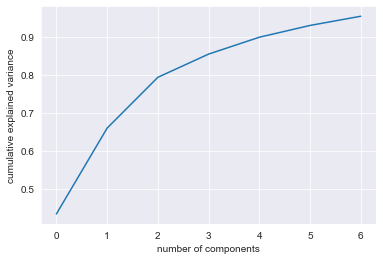

In [76]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [77]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [78]:
X_train_pca

array([[ 1.45955647e+00, -4.38527721e-01, -2.02381241e-01, ...,
        -4.21490584e-02, -1.56575783e-01, -5.07710822e-01],
       [-3.82112571e+00, -4.46071754e-01,  1.26830136e+00, ...,
         1.73776381e-01, -4.06242206e-01, -7.70924502e-01],
       [-3.74553575e+00, -8.11559498e-01, -1.91817760e+00, ...,
        -5.77061898e-01,  7.13260617e-01,  3.17479229e-02],
       ...,
       [ 3.84441839e+00,  3.46960938e+00,  1.67682430e+00, ...,
         2.51979644e-01, -1.63236756e-01,  1.94023168e+00],
       [-3.46339584e+00,  7.73411844e-02,  2.24875642e+00, ...,
         1.02629296e+00, -5.82402510e-01,  5.27624024e-01],
       [ 3.99516300e-01, -1.79724622e+00,  2.41216560e+00, ...,
         1.13858851e+00,  1.69379009e+00, -1.66016189e-03]])

LDA

In [79]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

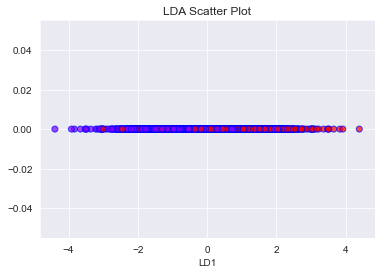

In [80]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [81]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [82]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [84]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the coef_ did not converge
The max_iter was reached which means the

{'C': 0.4342857142857143, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.73
Precision: 0.73
Recall: 0.73
F1-score: 0.73
ROC-AUC score: 0.73


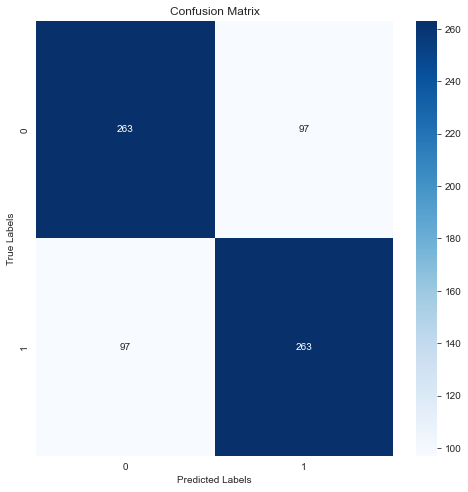

In [85]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Support Vector Machine model

In [86]:
from sklearn.svm import SVC

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 1, 15)
KERNEL = ['linear', 'poly', 'rbf', 'sigmoid']
GAMMA = ['scale', 'auto']

PARAM_GRID  = {
    'C': C,
    'kernel': KERNEL,
    'gamma': GAMMA
}

# Create the support vector machine estimator
estimator = SVC(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'C': 0.505, 'gamma': 'scale', 'kernel': 'linear'}

Evaluate the best model on the test data

Support Vector Machine (test data)
Accuracy: 0.74
Precision: 0.74
Recall: 0.74
F1-score: 0.74
ROC-AUC score: 0.74


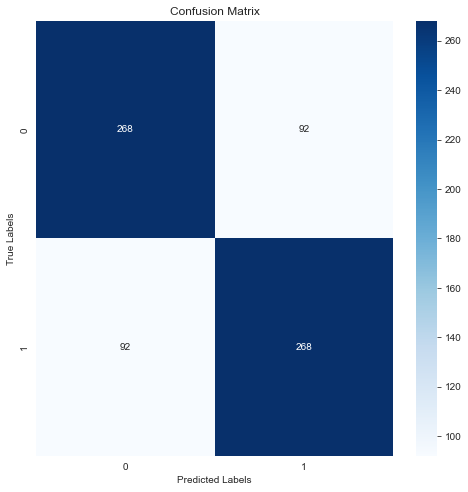

In [87]:
svm_best_estimator = model_searcher.best_estimator_
y_test_pred = svm_best_estimator.predict(X_test_preprocessed)

evaluate_model("Support Vector Machine (test data)", y_test, y_test_pred)

Gradient Boosting model

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 5)
N_ESTIMATORS = range(100, 180, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.11888888888888888, 'max_depth': 3, 'n_estimators': 130}

Gradient Boosting (test data)
Accuracy: 0.71
Precision: 0.71
Recall: 0.71
F1-score: 0.71
ROC-AUC score: 0.71


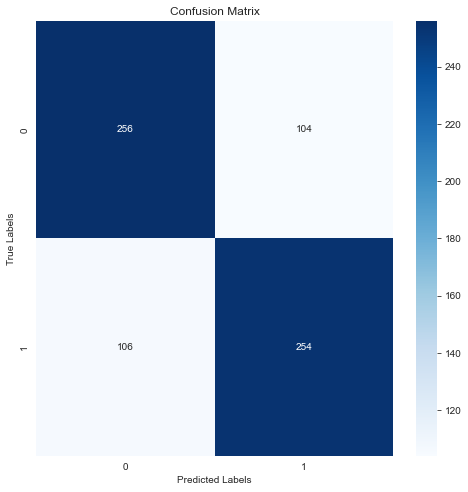

In [89]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [90]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 140, 15)
MAX_DEPTH = range(2, 6)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 4)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

Random Forest (test data)
Accuracy: 0.7
Precision: 0.7
Recall: 0.69
F1-score: 0.69
ROC-AUC score: 0.7


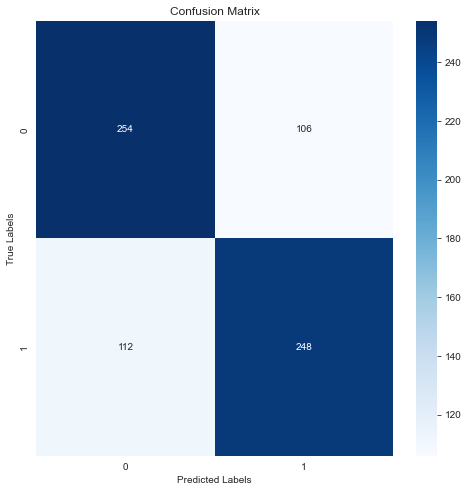

In [91]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)


XGBoost model

In [92]:
# from xgboost import XGBClassifier
# 
# # Define the range of values for each hyperparameter
# LEARNING_RATE = np.linspace(0.05, 0.5, 10)
# MAX_DEPTH = range(1, 5)
# N_ESTIMATORS = range(70, 150, 15)
# 
# PARAM_GRID  = {
#     'learning_rate': LEARNING_RATE,
#     'max_depth': MAX_DEPTH,
#     'n_estimators': N_ESTIMATORS
# }
# 
# # Define the ratio for scale_pos_weight
# ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)
# 
# # Create a XGBoost classifier with specific parameters
# estimator = XGBClassifier(objective='binary:logistic', scale_pos_weight=ratio)
# 
# 
# # Use grid search and cross-validation to tune the hyper parameters
# model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
# model_searcher.fit(X_train_preprocessed, y_train)
# 
# # The best combination of hyperparameters
# model_searcher.best_params_

Evaluate the best model on the test data

In [93]:
# xgb_best_estimator = model_searcher.best_estimator_
# y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)
# 
# evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [94]:
!pip install pytorch-tabnet
!pip install optuna

In [95]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [96]:
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 19),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet = TabNetClassifier(**best_params)
tabnet.fit(X_train_np, y_train)
best_params

[I 2023-10-14 15:38:48,521] A new study created in memory with name: no-name-f677668d-b052-44ef-be12-4ae37df966eb



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.79383


Best weights from best epoch are automatically used!
[I 2023-10-14 15:39:03,418] Trial 0 finished with value: 0.7938271604938272 and parameters: {'n_d': 13, 'n_a': 16, 'n_steps': 3, 'gamma': 0.4869262574644414, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.07829332443336465}. Best is trial 0 with value: 0.7938271604938272.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.75776


Best weights from best epoch are automatically used!
[I 2023-10-14 15:39:50,514] Trial 1 finished with value: 0.7577623456790124 and parameters: {'n_d': 56, 'n_a': 51, 'n_steps': 15, 'gamma': 1.341974292192904, 'n_independent': 6, 'n_shared': 3, 'lambda_sparse': 0.036618917322976056}. Best is trial 0 with value: 0.7938271604938272.



Early stopping occurred at epoch 33 with best_epoch = 23 and best_val_0_auc = 0.80947


Best weights from best epoch are automatically used!
[I 2023-10-14 15:40:07,215] Trial 2 finished with value: 0.8094675925925925 and parameters: {'n_d': 51, 'n_a': 45, 'n_steps': 3, 'gamma': 0.2429283424688301, 'n_independent': 4, 'n_shared': 7, 'lambda_sparse': 0.020327492087101218}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.80789


Best weights from best epoch are automatically used!
[I 2023-10-14 15:40:29,862] Trial 3 finished with value: 0.8078858024691358 and parameters: {'n_d': 19, 'n_a': 22, 'n_steps': 7, 'gamma': 0.4702553236648256, 'n_independent': 3, 'n_shared': 9, 'lambda_sparse': 0.004044288373919269}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.78811


Best weights from best epoch are automatically used!
[I 2023-10-14 15:40:43,749] Trial 4 finished with value: 0.7881095679012347 and parameters: {'n_d': 53, 'n_a': 51, 'n_steps': 5, 'gamma': 0.39853589311058524, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.014106156392412453}. Best is trial 2 with value: 0.8094675925925925.
Best weights from best epoch are automatically used!
[I 2023-10-14 15:40:48,194] Trial 5 finished with value: 0.7802469135802468 and parameters: {'n_d': 61, 'n_a': 36, 'n_steps': 1, 'gamma': 1.3958929033761656, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.003479702640447788}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.78025

Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.55159


Best weights from best epoch are automatically used!
[I 2023-10-14 15:41:25,115] Trial 6 finished with value: 0.5515856481481483 and parameters: {'n_d': 17, 'n_a': 8, 'n_steps': 19, 'gamma': 1.148188482944694, 'n_independent': 7, 'n_shared': 10, 'lambda_sparse': 0.08451230092019124}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 37 with best_epoch = 27 and best_val_0_auc = 0.79792


Best weights from best epoch are automatically used!
[I 2023-10-14 15:42:06,795] Trial 7 finished with value: 0.7979243827160495 and parameters: {'n_d': 42, 'n_a': 16, 'n_steps': 10, 'gamma': 0.6884832489105915, 'n_independent': 1, 'n_shared': 10, 'lambda_sparse': 0.009961732845964957}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 51 with best_epoch = 41 and best_val_0_auc = 0.7845


Best weights from best epoch are automatically used!
[I 2023-10-14 15:43:32,245] Trial 8 finished with value: 0.7844984567901234 and parameters: {'n_d': 24, 'n_a': 40, 'n_steps': 11, 'gamma': 1.8066886144343788, 'n_independent': 5, 'n_shared': 9, 'lambda_sparse': 0.05533535754777782}. Best is trial 2 with value: 0.8094675925925925.
Best weights from best epoch are automatically used!
[I 2023-10-14 15:43:36,968] Trial 9 finished with value: 0.7669675925925925 and parameters: {'n_d': 13, 'n_a': 18, 'n_steps': 3, 'gamma': 1.4160231035471897, 'n_independent': 4, 'n_shared': 2, 'lambda_sparse': 0.07518033847362295}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.76697

Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.79737


Best weights from best epoch are automatically used!
[I 2023-10-14 15:44:45,149] Trial 10 finished with value: 0.7973688271604938 and parameters: {'n_d': 40, 'n_a': 58, 'n_steps': 8, 'gamma': 0.10363699784980085, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.03039683629217595}. Best is trial 2 with value: 0.8094675925925925.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.81198


Best weights from best epoch are automatically used!
[I 2023-10-14 15:45:09,625] Trial 11 finished with value: 0.811983024691358 and parameters: {'n_d': 29, 'n_a': 33, 'n_steps': 6, 'gamma': 0.7595376998652392, 'n_independent': 3, 'n_shared': 7, 'lambda_sparse': 0.00036675539243480326}. Best is trial 11 with value: 0.811983024691358.



Early stopping occurred at epoch 46 with best_epoch = 36 and best_val_0_auc = 0.80792


Best weights from best epoch are automatically used!
[I 2023-10-14 15:45:52,027] Trial 12 finished with value: 0.8079243827160495 and parameters: {'n_d': 31, 'n_a': 34, 'n_steps': 6, 'gamma': 0.8462877252423306, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.02192673659865419}. Best is trial 11 with value: 0.811983024691358.
Best weights from best epoch are automatically used!
[I 2023-10-14 15:45:57,421] Trial 13 finished with value: 0.7767052469135802 and parameters: {'n_d': 48, 'n_a': 45, 'n_steps': 1, 'gamma': 0.13649151698553397, 'n_independent': 1, 'n_shared': 7, 'lambda_sparse': 0.001479748568609977}. Best is trial 11 with value: 0.811983024691358.



Early stopping occurred at epoch 29 with best_epoch = 19 and best_val_0_auc = 0.77671

Early stopping occurred at epoch 41 with best_epoch = 31 and best_val_0_auc = 0.79499


Best weights from best epoch are automatically used!
[I 2023-10-14 15:46:47,560] Trial 14 finished with value: 0.7949922839506174 and parameters: {'n_d': 32, 'n_a': 63, 'n_steps': 10, 'gamma': 0.9203139317175839, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.021651599826672224}. Best is trial 11 with value: 0.811983024691358.



Early stopping occurred at epoch 45 with best_epoch = 35 and best_val_0_auc = 0.79691


Best weights from best epoch are automatically used!
[I 2023-10-14 15:47:24,963] Trial 15 finished with value: 0.7969058641975308 and parameters: {'n_d': 46, 'n_a': 29, 'n_steps': 4, 'gamma': 0.7592948916673397, 'n_independent': 9, 'n_shared': 8, 'lambda_sparse': 0.04267142451840331}. Best is trial 11 with value: 0.811983024691358.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.81274


Best weights from best epoch are automatically used!
[I 2023-10-14 15:47:43,992] Trial 16 finished with value: 0.8127391975308642 and parameters: {'n_d': 28, 'n_a': 28, 'n_steps': 13, 'gamma': 0.3096115722064988, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.018452417971399324}. Best is trial 16 with value: 0.8127391975308642.



Early stopping occurred at epoch 20 with best_epoch = 10 and best_val_0_auc = 0.76577


Best weights from best epoch are automatically used!
[I 2023-10-14 15:47:52,972] Trial 17 finished with value: 0.7657716049382717 and parameters: {'n_d': 24, 'n_a': 27, 'n_steps': 13, 'gamma': 0.6105674155141982, 'n_independent': 2, 'n_shared': 1, 'lambda_sparse': 0.027344951884489467}. Best is trial 16 with value: 0.8127391975308642.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.77264


Best weights from best epoch are automatically used!
[I 2023-10-14 15:48:19,296] Trial 18 finished with value: 0.7726388888888889 and parameters: {'n_d': 34, 'n_a': 27, 'n_steps': 16, 'gamma': 0.3329720397281879, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.013289399138163635}. Best is trial 16 with value: 0.8127391975308642.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.79851


Best weights from best epoch are automatically used!
[I 2023-10-14 15:48:39,279] Trial 19 finished with value: 0.7985108024691357 and parameters: {'n_d': 24, 'n_a': 33, 'n_steps': 13, 'gamma': 0.5866673709148725, 'n_independent': 2, 'n_shared': 4, 'lambda_sparse': 0.0014844768582768716}. Best is trial 16 with value: 0.8127391975308642.



Early stopping occurred at epoch 26 with best_epoch = 16 and best_val_0_auc = 0.79014


Best weights from best epoch are automatically used!
[I 2023-10-14 15:49:29,888] Trial 20 finished with value: 0.790138888888889 and parameters: {'n_d': 28, 'n_a': 9, 'n_steps': 19, 'gamma': 0.31474145218766836, 'n_independent': 6, 'n_shared': 6, 'lambda_sparse': 0.09842881394371913}. Best is trial 16 with value: 0.8127391975308642.
Device used : cpu
No early stopping will be performed, last training weights will be used.


epoch 0  | loss: 1.39603 |  0:00:00s
epoch 1  | loss: 1.07601 |  0:00:01s
epoch 2  | loss: 0.82163 |  0:00:02s
epoch 3  | loss: 0.74876 |  0:00:03s
epoch 4  | loss: 0.69584 |  0:00:04s
epoch 5  | loss: 0.65322 |  0:00:05s
epoch 6  | loss: 0.64915 |  0:00:06s
epoch 7  | loss: 0.61549 |  0:00:07s
epoch 8  | loss: 0.59501 |  0:00:07s
epoch 9  | loss: 0.58338 |  0:00:08s
epoch 10 | loss: 0.58531 |  0:00:09s
epoch 11 | loss: 0.56678 |  0:00:10s
epoch 12 | loss: 0.5702  |  0:00:11s
epoch 13 | loss: 0.55462 |  0:00:12s
epoch 14 | loss: 0.55017 |  0:00:13s
epoch 15 | loss: 0.53068 |  0:00:14s
epoch 16 | loss: 0.52054 |  0:00:15s
epoch 17 | loss: 0.51401 |  0:00:15s
epoch 18 | loss: 0.50417 |  0:00:16s
epoch 19 | loss: 0.49745 |  0:00:17s
epoch 20 | loss: 0.49317 |  0:00:18s
epoch 21 | loss: 0.4773  |  0:00:19s
epoch 22 | loss: 0.46891 |  0:00:20s
epoch 23 | loss: 0.46429 |  0:00:21s
epoch 24 | loss: 0.46563 |  0:00:22s
epoch 25 | loss: 0.44641 |  0:00:23s
epoch 26 | loss: 0.44437 |  0:00:24s
e

{'n_d': 28,
 'n_a': 28,
 'n_steps': 13,
 'gamma': 0.3096115722064988,
 'n_independent': 3,
 'n_shared': 5,
 'lambda_sparse': 0.018452417971399324}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.66
Precision: 0.67
Recall: 0.64
F1-score: 0.65
ROC-AUC score: 0.66


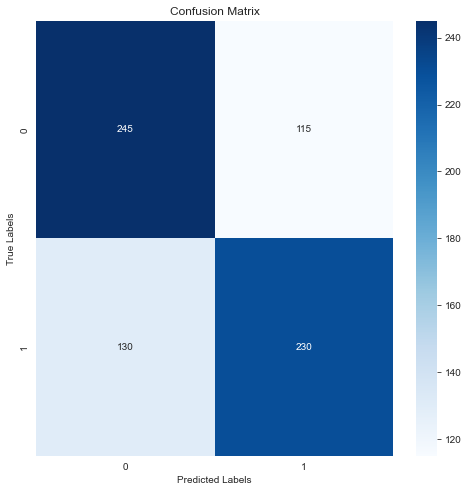

In [97]:
# Evaluate final model on test set
y_test_pred = tabnet.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [102]:
the_best_model_ever = gb_best_estimator

Feature importance

In [103]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

AttributeError: 'SVC' object has no attribute 'feature_importances_'

SHAP values for the best model

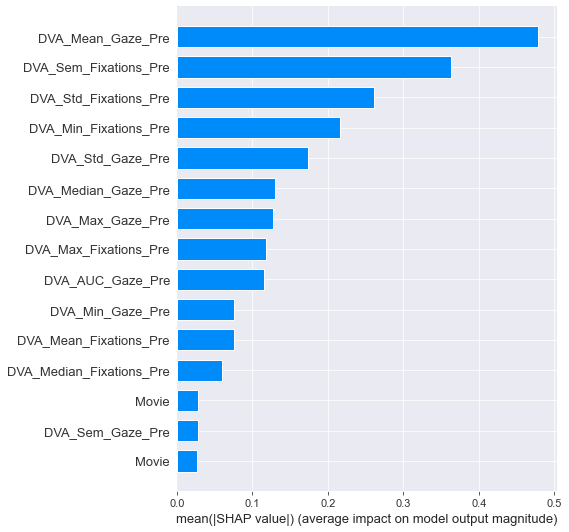

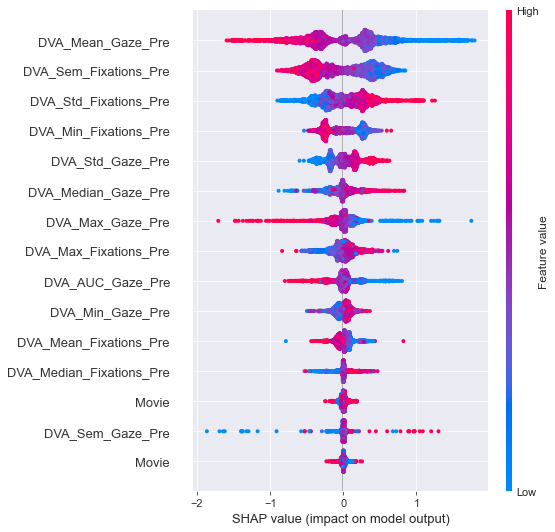

shap.plots.force is slow for many thousands of rows, try subsampling your data.


ValueError: Could not find feature named: DVA_Mean

In [100]:
import shap

# Create object that can calculate shap values
explainer = shap.TreeExplainer(the_best_model_ever)

# Calculate Shap values
shap_values = explainer.shap_values(X_train_preprocessed)

# Plot summary plot
shap.summary_plot(shap_values, X_train_preprocessed, plot_type="bar")

# Plot summary plot
shap.summary_plot(shap_values, X_train_preprocessed)

# Plot force plot
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train_preprocessed.iloc[0,:])

# Plot force plot
shap.force_plot(explainer.expected_value, shap_values, X_train_preprocessed)

# Plot dependence plot
shap.dependence_plot('DVA_Mean', shap_values, X_train_preprocessed)